In [22]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import IPython.display as ipd
import numpy as np
%matplotlib notebook
from scipy.signal import lfilter

In [23]:
# parameter setting
amp = 2    # range [0.0, 1.0]
sr = 10000       # sampling rate, Hz # 얼마나 정보를 촘촘하게 할 것인가
dur = 0.5        # in seconds # 얼마나 길게
freq = 100.0     # sine frequency, Hz # sine wave가 얼마나 반복될 것인가 
# sr와 freq는 같이 unit을 쓰지만 sr은 점들이 1초동안 얼마나 많이 나오는가, freq는 shape이 얼마나 반복이 되는가라는 차이가 있음 

In [24]:
# generate time
t = np.arange(1, sr * dur+1)/sr

In [25]:
# generate phase
theta = t * 10*np.pi * freq

In [28]:
## !pip install sounddevice # numpy와 반대로 유명하지 않은 library이기 때문에 깔아주어야함
import sounddevice as sd # 윗 줄 없이 실행했을 때 에러 발생
sd.play(c.real, sr)  

In [29]:
ipd. Audio(s, rate=sr)

In [30]:
## amplitude를 phasor에 심는 방법
s = amp*np.sin(theta) #디폴트 amplitude 값은 1, 위에서 parameter를 2로 바꾸면 -2에서 2까지 

<IPython.core.display.Javascript object>


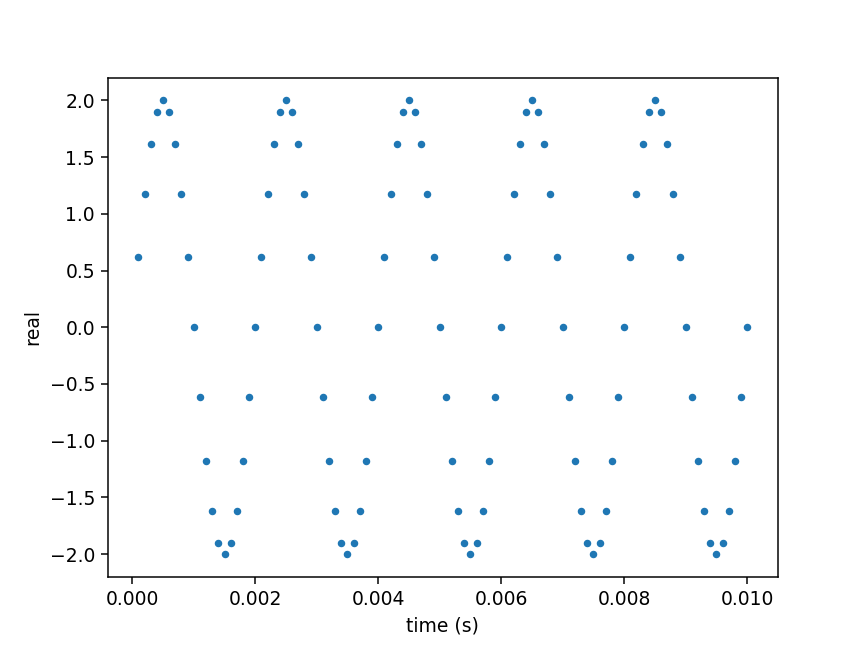

Text(0, 0.5, 'real')

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:100], s[0:100], '.') 
ax.set_xlabel('time (s)')
ax.set_ylabel('real')

In [32]:
c = amp*np.exp(theta*1j) # 소용돌이 치는 모양 안의 직경이 커짐?

<IPython.core.display.Javascript object>


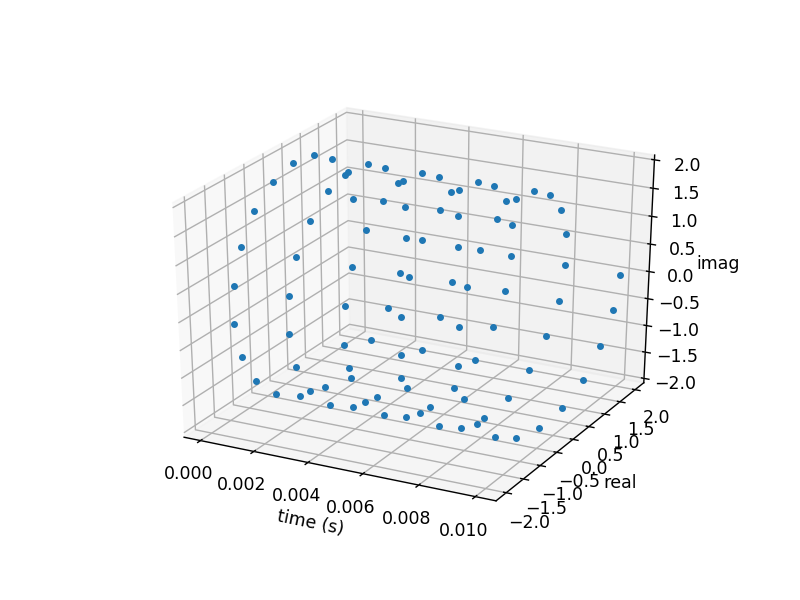

Text(0.5, 0, 'imag')

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(t[0:100], c.real[0:100], c.imag[0:100], '.') 
ax.set_xlabel('time (s)')
ax.set_ylabel('real')
ax.set_zlabel('imag')
#스프링 안 원의 반지름은 2, 직경은 4

In [35]:
ipd. Audio(c.real, rate=sr) # amplitude가 커져서 조금 더 큰 소리가 나옴 

In [ ]:
## pulsetrain
#최소에 해당되는 harmonics를 정하고 freq를 정해서 배수로 감?
#가장 낮은 freq에 해당하는 f0 정하기 - sine wave 만들기 

# sampling rate = 100hz이면 표현할 수 있는 숫자의 갯수가 일초에 백개, 이것을 가지고 1hz의 freq 표현이 가능할까? 
# 가능. 한번의 sine wave의 주기가 있으면 .. 2hz의 표현도 가능. 
# .... 10000hz의 표현은 가능할까? 불가능. 주어진 숫자 100개로 10000번 왔다갔다 할 수 없음 / sr이 충분히 있어야 그만큼의 주파수를 표현할 수 있음
# 공책 필기 - sr의 half에 해당하는 niquist frequency까지가 숫자 상으로 표현할 수 있는 frequency의 maximum 

<IPython.core.display.Javascript object>


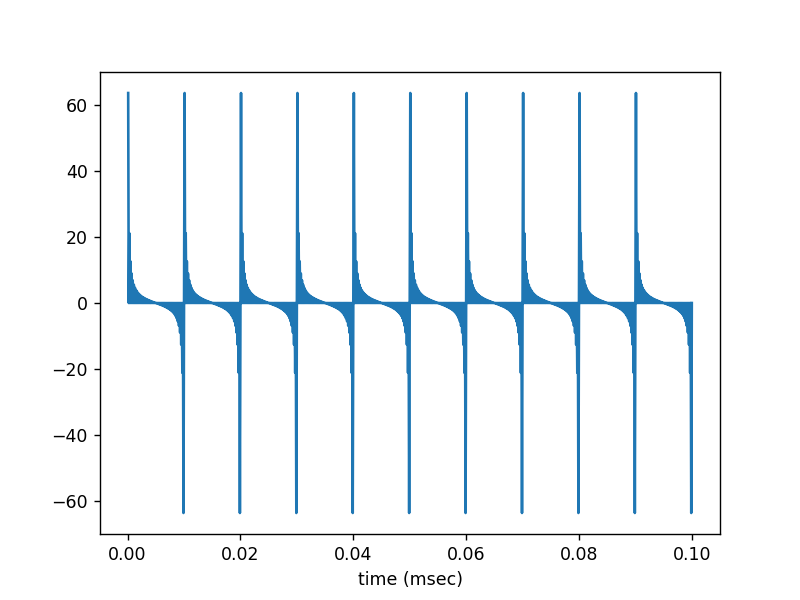

In [37]:
## generate samples, note conversion to float32 array
F0 = 100; Fend = int(sr/2); s = np.zeros(len(t)); # 가장 낮은 frequency가 100, 무한대까지 올라가는 것이 아니라 'sr의 반'까지 올라감? 
# Fend : 가장 마지막 f # sr/2 = Niquist frequency # time은 만들었다고 assume한 상태
for freq in range(F0, Fend+1, F0): #f0인 100부터 / Fend까지 늘려가는데 / increament를 100(f0만큼) # 100,200,300...이 freq로 들어와서 루프를 50번정도 돌게 됨 
    theta = t * 2*np.pi * freq 
    
    s = s + amp * np.sin(theta)  # s(signal)이라는 변수 # 처음 s에 만든 것을 더하고, old s 에 또 만든 것을 더해서 s로 하고.. 
    # 처음의 s값을 정의해주어야함 -> 첫줄 (t 벡터의 갯수만큼 0을 만듦) 
    # sine wave를 만들어서 계속해서 더함
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s[0:1000]); # 다 더해진 상태의 s
ax.set_xlabel('time (msec)')
ipd.Audio(s, rate=sr)

#pulse train : sr이 훨씬 많았다면 선 하나와 000..의 연속의 모양에 가까울 것